**Importing Packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.formula.api import ols

%config InlineBackend.figure_format = 'retina'
sns.set(
    style='ticks', 
    context='talk', 
    font_scale=0.8, 
    rc={'figure.figsize': (8,6)}
    )

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install --upgrade scikit-learn -q --user

In [4]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import mean_squared_error
from functools import partial
rmse = partial(mean_squared_error, squared=False)

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, ParameterGrid

from sklearn.preprocessing import MinMaxScaler

from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

from statsmodels.formula.api import ols
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from functools import partial
rmse = partial(mean_squared_error, squared=False)

In [6]:
!pip install -q shap
import shap
shap.initjs()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 7.2 MB/s eta 0:00:00


 **Uploading the CSV file**

In [7]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


**Reading the CSV file**

In [8]:
#path = "C:/Users/shree/Downloads/adverts.csv"
#adverts = pd.read_csv(path)

In [9]:
path = "/content/drive/MyDrive/adverts.csv"
adverts = pd.read_csv(path)

Taking a sample space to make analysis fasters and easy.

In [10]:
advsamp = adverts.sample(n=40200, random_state=100, replace=True, ignore_index=True)

In [11]:
advsamp.head()

public_reference  mileage reg_code standard_colour standard_make  \
0   202009093528008  20432.0       17            Grey          SEAT   
1   202006240481966    400.0       69           Black       Hyundai   
2   202010024520933  30699.0       17            Blue      Vauxhall   
3   202001316807940  60000.0       13            Grey    Land Rover   
4   202004068873686      3.0      NaN          Silver         SKODA   

  standard_model vehicle_condition  year_of_registration  price  body_type  \
0       Alhambra              USED                2017.0  16000        MPV   
1          Ioniq              USED                2020.0  18950  Hatchback   
2        Mokka X              USED                2017.0  10450        SUV   
3   Freelander 2              USED                2013.0  11995        SUV   
4          Fabia               NEW                   NaN  16560  Hatchback   

   crossover_car_and_van      fuel_type  
0                  False         Diesel  
1                  False  Petrol Hybrid  
2                  False         Petrol  
3                  False         Diesel  
4                  False         Petrol

In [12]:
advsamp.tail()

public_reference   mileage reg_code standard_colour standard_make  \
40195   202009173867957    3265.0       19           White           BMW   
40196   202009163804680   76000.0       07          Silver           BMW   
40197   202010165099428  123000.0       62           White      Vauxhall   
40198   202010295583511   16000.0       66            Grey         Mazda   
40199   202009234082535   25036.0       17           White    Volkswagen   

      standard_model vehicle_condition  year_of_registration  price  \
40195             X5              USED                2019.0  54450   
40196             Z4              USED                2007.0   6950   
40197       Insignia              USED                2012.0   2390   
40198           CX-3              USED                2016.0  11500   
40199           Polo              USED                2017.0   9950   

         body_type  crossover_car_and_van fuel_type  
40195          SUV                  False    Petrol  
40196  Convertible                  False    Petrol  
40197       Estate                  False    Diesel  
40198          SUV                  False    Petrol  
40199    Hatchback                  False    Petrol

# **1. Data Processing for Machine Learning**

 **Dealing with Missing Values, Outliers, and Noise**

In [13]:
advsamp['mileage']= advsamp['mileage'].fillna(0)
advsamp['reg_code']= advsamp['reg_code'].fillna(0)
advsamp['standard_colour']= advsamp['standard_colour'].fillna(0)
advsamp['standard_make']= advsamp['standard_make'].fillna(0)
advsamp['year_of_registration']= advsamp['year_of_registration'].fillna(0)
advsamp['body_type']= advsamp['body_type'].fillna(0)
advsamp['fuel_type']= advsamp['fuel_type'].fillna(0)


In [14]:
advsamp.isnull().sum()

public_reference         0
mileage                  0
reg_code                 0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
dtype: int64

Plotting a boxplot of quantitative variables to find out outliers.

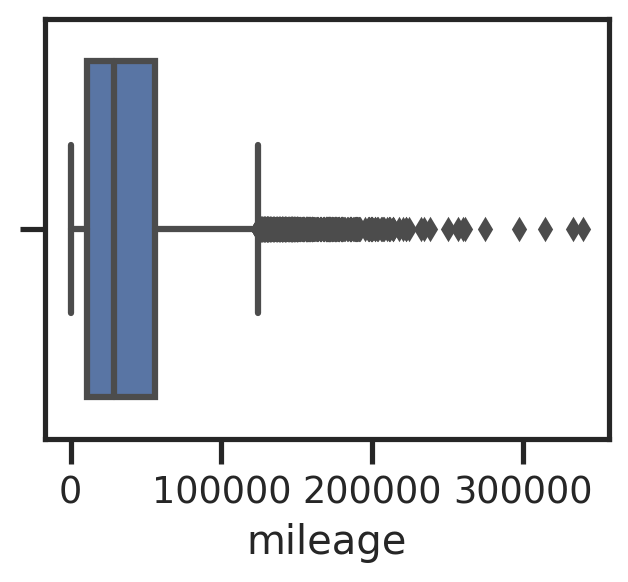

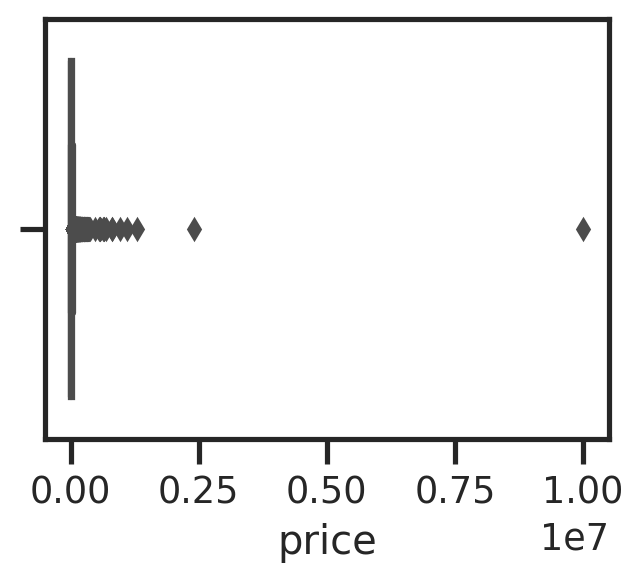

In [15]:
plt.subplot(2,2,4)
sns.boxplot(data=advsamp,x='mileage')
plt.show()
plt.subplot(2,2,4)

plt.subplot(2,2,4)
sns.boxplot(data=advsamp,x='price')
plt.show()



In [16]:
new_df = advsamp.copy()

In [17]:
#Finding the Inter Quartile Range of mileage

Q1 = new_df['mileage'].quantile(0.25)
Q3 = new_df['mileage'].quantile(0.75)

iqr=Q3-Q1
upper_limit = Q3 + 1.5 * iqr
lower_limit = Q1 - 1.5 * iqr

new_df[new_df['mileage'] > upper_limit]
new_df[new_df['mileage'] < lower_limit]

new_df2 = new_df[new_df['mileage'] < upper_limit]

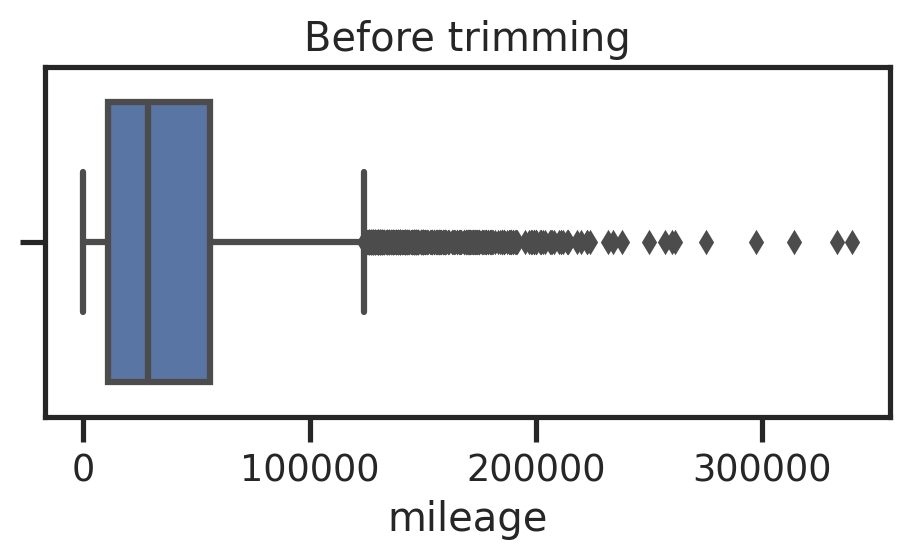

In [18]:
plt.figure(figsize=(12,5))
plt.subplot(2,2,2)
plt.title("Before trimming")
sns.boxplot(data=new_df, x='mileage')
plt.show()

plt.figure(figsize=(12,5))
plt.subplot(2,2,4)
plt.title("After trimming")
sns.boxplot(data=new_df2,x='mileage')
plt.show()

In [19]:
#Finding the Inter Quartile Range for price
new_df3 = new_df2.copy()
Q1 = new_df3['price'].quantile(0.25)
Q3 = new_df3['price'].quantile(0.75)

iqr=Q3-Q1
upper_limit = Q3 + 1.5 * iqr
lower_limit = Q1 - 1.5 * iqr

new_df3[new_df3['price'] > upper_limit]
new_df3[new_df3['price'] < lower_limit]

new_df4 = new_df3[new_df3['price'] < upper_limit]

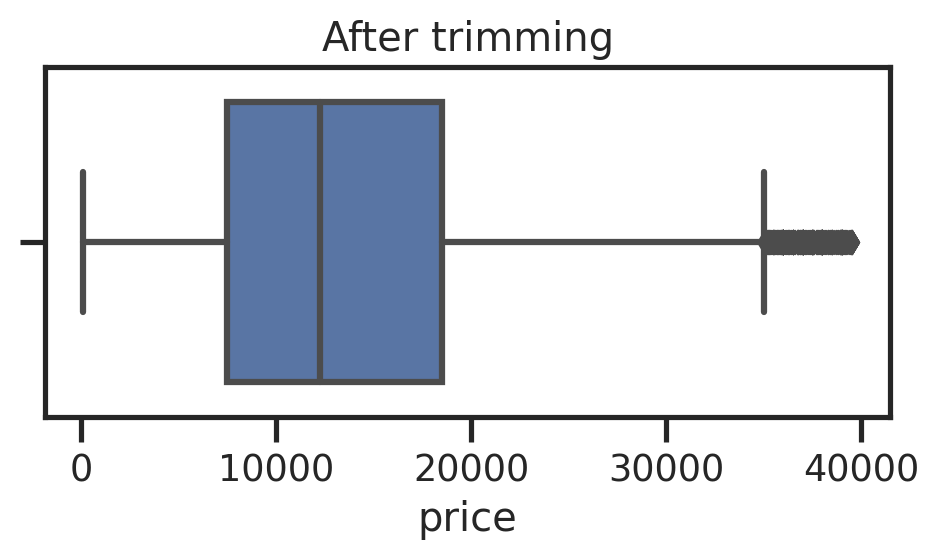

In [20]:
plt.figure(figsize=(12,5))
plt.subplot(2,2,2)
plt.title("Before trimming")
sns.boxplot(data=new_df3, x='price')
plt.show()

plt.figure(figsize=(12,5))
plt.subplot(2,2,4)
plt.title("After trimming")
sns.boxplot(data=new_df4,x='price')
plt.show()

In [21]:
new_df4['mileage'] = new_df4['mileage'].fillna(new_df4['mileage'].median())


In [22]:
print("Total Missing values in mileage after filling null values with median values: ",new_df4['mileage'].isna().sum())

Total Missing values in mileage after filling null values with median values:  0


In [23]:
#Finding Mode values of standard_colour .
mode = new_df4['standard_colour'].mode()[0]
print("The most Recurring color of car is: ",mode)
print("Total Missing values in colour before filling: ",new_df4['standard_colour'].isna().sum())

#Using the mode values to fill in the missing values.
new_df4['standard_colour'] = new_df4['standard_colour'].fillna(new_df4['standard_colour'].mode()[0])
print("Total Missing values in colour after filling: ",new_df4['standard_colour'].isna().sum())

The most Recurring color of car is:  Black
Total Missing values in colour before filling:  0
Total Missing values in colour after filling:  0


In [24]:
advsamp.head()

public_reference  mileage reg_code standard_colour standard_make  \
0   202009093528008  20432.0       17            Grey          SEAT   
1   202006240481966    400.0       69           Black       Hyundai   
2   202010024520933  30699.0       17            Blue      Vauxhall   
3   202001316807940  60000.0       13            Grey    Land Rover   
4   202004068873686      3.0        0          Silver         SKODA   

  standard_model vehicle_condition  year_of_registration  price  body_type  \
0       Alhambra              USED                2017.0  16000        MPV   
1          Ioniq              USED                2020.0  18950  Hatchback   
2        Mokka X              USED                2017.0  10450        SUV   
3   Freelander 2              USED                2013.0  11995        SUV   
4          Fabia               NEW                   0.0  16560  Hatchback   

   crossover_car_and_van      fuel_type  
0                  False         Diesel  
1                  False  Petrol Hybrid  
2                  False         Petrol  
3                  False         Diesel  
4                  False         Petrol

In [25]:
#Finding Mode values of fuel_type
mode = new_df4['fuel_type'].mode()[0]
print("The most Recurring fuel type of car is: ",mode)
print("Total Missing values in fuel_type before filling: ",new_df4['fuel_type'].isna().sum())

#Using the mode values to fill in the missing values.
new_df4['fuel_type'] = new_df4['fuel_type'].fillna(new_df4['fuel_type'].mode()[0])
print("Total Missing values in fuel_type after filling: ",new_df4['fuel_type'].isna().sum())

The most Recurring fuel type of car is:  Petrol
Total Missing values in fuel_type before filling:  0
Total Missing values in fuel_type after filling:  0


In [26]:
#Finding Mode values of body_type
mode = new_df4['body_type'].mode()[0]
print("The most Recurring fuel type of car is: ",mode)
print("Total Missing values in body_type before filling: ",new_df4['body_type'].isna().sum())

#Using the mode values to fill in the missing values.
new_df4['body_type'] = new_df4['body_type'].fillna(new_df4['body_type'].mode()[0])
print("Total Missing values in fuel_type after filling: ",new_df4['body_type'].isna().sum())

The most Recurring fuel type of car is:  Hatchback
Total Missing values in body_type before filling:  0
Total Missing values in fuel_type after filling:  0


In [27]:
new_df4.head()

public_reference  mileage reg_code standard_colour standard_make  \
0   202009093528008  20432.0       17            Grey          SEAT   
1   202006240481966    400.0       69           Black       Hyundai   
2   202010024520933  30699.0       17            Blue      Vauxhall   
3   202001316807940  60000.0       13            Grey    Land Rover   
4   202004068873686      3.0        0          Silver         SKODA   

  standard_model vehicle_condition  year_of_registration  price  body_type  \
0       Alhambra              USED                2017.0  16000        MPV   
1          Ioniq              USED                2020.0  18950  Hatchback   
2        Mokka X              USED                2017.0  10450        SUV   
3   Freelander 2              USED                2013.0  11995        SUV   
4          Fabia               NEW                   0.0  16560  Hatchback   

   crossover_car_and_van      fuel_type  
0                  False         Diesel  
1                  False  Petrol Hybrid  
2                  False         Petrol  
3                  False         Diesel  
4                  False         Petrol

In [28]:
import datetime

today = datetime.date.today()
year = today.year

new_df4.loc[(new_df4['vehicle_condition'] == 'NEW') & (new_df4['year_of_registration'].isnull()) & (new_df4['reg_code'].isnull()), 'year_of_registration'] = year
new_df4.loc[(new_df4['year_of_registration'] == year) & (new_df4['year_of_registration'].isnull()), 'reg_code'] = str(year)[-2:]
new_df4.loc[(new_df4['year_of_registration'] == year) & (new_df4['year_of_registration'] == str(year)[-2:]), 'mileage'] = 0.0

In [29]:
new_df4 = new_df4[new_df4.reg_code.apply(lambda x: str(x).isnumeric())]

In [30]:
new_df4.head()

public_reference  mileage reg_code standard_colour standard_make  \
0   202009093528008  20432.0       17            Grey          SEAT   
1   202006240481966    400.0       69           Black       Hyundai   
2   202010024520933  30699.0       17            Blue      Vauxhall   
3   202001316807940  60000.0       13            Grey    Land Rover   
4   202004068873686      3.0        0          Silver         SKODA   

  standard_model vehicle_condition  year_of_registration  price  body_type  \
0       Alhambra              USED                2017.0  16000        MPV   
1          Ioniq              USED                2020.0  18950  Hatchback   
2        Mokka X              USED                2017.0  10450        SUV   
3   Freelander 2              USED                2013.0  11995        SUV   
4          Fabia               NEW                   0.0  16560  Hatchback   

   crossover_car_and_van      fuel_type  
0                  False         Diesel  
1                  False  Petrol Hybrid  
2                  False         Petrol  
3                  False         Diesel  
4                  False         Petrol

A new feature is  created age of car.
 

In [31]:
#Copying the cleaned dataset to a new dataset fd for feature engineering and further processes.
new_df5=new_df4.copy()
new_df5['Current_Year']=2023 # adding new coloumn to the dataset to calculate age
#Converting the Data Type of year of registration from float to int to calculate the number of years/age of vehicle.

new_df5['year_of_registration'] = new_df5['year_of_registration'].astype(int) # type conversion
new_df5['age_of_car']=2023-new_df5['year_of_registration']# calculating age and adding new column "Age" to the dataset
new_df5.drop(['Current_Year'],axis=1, inplace=True)#dropping the reg_year and current year coloumn from the dataset

In [32]:
new_df5.loc[new_df5['age_of_car']==2023, 'age_of_car']=0


In [33]:
new_df5.head()

public_reference  mileage reg_code standard_colour standard_make  \
0   202009093528008  20432.0       17            Grey          SEAT   
1   202006240481966    400.0       69           Black       Hyundai   
2   202010024520933  30699.0       17            Blue      Vauxhall   
3   202001316807940  60000.0       13            Grey    Land Rover   
4   202004068873686      3.0        0          Silver         SKODA   

  standard_model vehicle_condition  year_of_registration  price  body_type  \
0       Alhambra              USED                  2017  16000        MPV   
1          Ioniq              USED                  2020  18950  Hatchback   
2        Mokka X              USED                  2017  10450        SUV   
3   Freelander 2              USED                  2013  11995        SUV   
4          Fabia               NEW                     0  16560  Hatchback   

   crossover_car_and_van      fuel_type  age_of_car  
0                  False         Diesel           6  
1                  False  Petrol Hybrid           3  
2                  False         Petrol           6  
3                  False         Diesel          10  
4                  False         Petrol           0

In [34]:
DF=new_df5.copy()

In [35]:
DF= DF.drop(['public_reference', 'crossover_car_and_van'],axis=1)

In [36]:
#Category Encoding for Standard make
DF['standard_make']=DF['standard_make'].astype(str) 
DF.groupby(['standard_make'])['price'].mean().sort_values() 
ordinal_stdmake=DF.groupby(['standard_make'])['price'].mean().sort_values().index 
{k:i for i,k in enumerate(ordinal_stdmake,0)} 

ordinal_stdmake2={k:i for i,k in enumerate(ordinal_stdmake,0)}
DF['standard_make_ordinal']=DF['standard_make'].map(ordinal_stdmake2)
DF.drop(['standard_make'],axis=1, inplace=True) 

In [37]:
#Category Encoding for Standard model
DF['standard_model']=DF['standard_model'].astype(str) 
DF.groupby(['standard_model'])['price'].mean().sort_values() 
ordinal_stdmodel=DF.groupby(['standard_model'])['price'].mean().sort_values().index 
{k:i for i,k in enumerate(ordinal_stdmodel,0)} 

ordinal_stdmodel2={k:i for i,k in enumerate(ordinal_stdmodel,0)}
DF['standard_model_ordinal']=DF['standard_model'].map(ordinal_stdmodel2)
DF.drop(['standard_model'],axis=1, inplace=True)

In [38]:
#Category Encoding for Standard colour
DF['standard_colour']=DF['standard_colour'].astype(str) 
DF.groupby(['standard_colour'])['price'].mean().sort_values() 
ordinal_stdclr=DF.groupby(['standard_colour'])['price'].mean().sort_values().index 
{k:i for i,k in enumerate(ordinal_stdclr,0)} 

ordinal_stdclr2={k:i for i,k in enumerate(ordinal_stdclr,0)}
DF['standard_colour_ordinal']=DF['standard_colour'].map(ordinal_stdclr2)
DF.drop(['standard_colour'],axis=1, inplace=True)


In [39]:
#Category Encoding for body type
DF['body_type']=DF['body_type'].astype(str) 
DF.groupby(['body_type'])['price'].mean().sort_values() 
ordinal_bd=DF.groupby(['body_type'])['price'].mean().sort_values().index 
{k:i for i,k in enumerate(ordinal_bd,0)} 

ordinal_bd2={k:i for i,k in enumerate(ordinal_bd,0)}
DF['body_type_ordinal']=DF['body_type'].map(ordinal_bd2)
DF.drop(['body_type'],axis=1, inplace=True) 

In [40]:
#Category Encoding for  fuel type
DF['fuel_type']=DF['fuel_type'].astype(str) 
DF.groupby(['fuel_type'])['price'].mean().sort_values() 
ordinal_ft=DF.groupby(['fuel_type'])['price'].mean().sort_values().index 
{k:i for i,k in enumerate(ordinal_ft,0)} 

ordinal_ft2={k:i for i,k in enumerate(ordinal_ft,0)}
DF['fuel_type_ordinal']=DF['fuel_type'].map(ordinal_ft2)
DF.drop(['fuel_type'],axis=1, inplace=True) 

In [41]:
DF

mileage reg_code vehicle_condition  year_of_registration  price  \
0       20432.0       17              USED                  2017  16000   
1         400.0       69              USED                  2020  18950   
2       30699.0       17              USED                  2017  10450   
3       60000.0       13              USED                  2013  11995   
4           3.0        0               NEW                     0  16560   
...         ...      ...               ...                   ...    ...   
40194   48856.0       12              USED                  2012   5690   
40196   76000.0       07              USED                  2007   6950   
40197  123000.0       62              USED                  2012   2390   
40198   16000.0       66              USED                  2016  11500   
40199   25036.0       17              USED                  2017   9950   

       age_of_car  standard_make_ordinal  standard_model_ordinal  \
0               6                     27                     365   
1               3                     22                     432   
2               6                     12                     295   
3              10                     49                     294   
4               0                     29                     247   
...           ...                    ...                     ...   
40194          11                     30                     275   
40196          16                     38                     394   
40197          11                     12                     255   
40198           7                     28                     342   
40199           6                     30                     275   

       standard_colour_ordinal  body_type_ordinal  fuel_type_ordinal  
0                           18                  2                  2  
1                           17                  1                  3  
2                           14                 10                  0  
3                           18                 10                  2  
4                            6                  1                  0  
...                        ...                ...                ...  
40194                       17                  1                  0  
40196                        6                  4                  0  
40197                       16                  5                  2  
40198                       18                 10                  0  
40199                       16                  1                  0  

[36587 rows x 11 columns]

In [42]:
DF['vehicle_condition'].replace({'USED':0,'NEW': 1}, inplace =True)

In [43]:
DF

mileage reg_code  vehicle_condition  year_of_registration  price  \
0       20432.0       17                  0                  2017  16000   
1         400.0       69                  0                  2020  18950   
2       30699.0       17                  0                  2017  10450   
3       60000.0       13                  0                  2013  11995   
4           3.0        0                  1                     0  16560   
...         ...      ...                ...                   ...    ...   
40194   48856.0       12                  0                  2012   5690   
40196   76000.0       07                  0                  2007   6950   
40197  123000.0       62                  0                  2012   2390   
40198   16000.0       66                  0                  2016  11500   
40199   25036.0       17                  0                  2017   9950   

       age_of_car  standard_make_ordinal  standard_model_ordinal  \
0               6                     27                     365   
1               3                     22                     432   
2               6                     12                     295   
3              10                     49                     294   
4               0                     29                     247   
...           ...                    ...                     ...   
40194          11                     30                     275   
40196          16                     38                     394   
40197          11                     12                     255   
40198           7                     28                     342   
40199           6                     30                     275   

       standard_colour_ordinal  body_type_ordinal  fuel_type_ordinal  
0                           18                  2                  2  
1                           17                  1                  3  
2                           14                 10                  0  
3                           18                 10                  2  
4                            6                  1                  0  
...                        ...                ...                ...  
40194                       17                  1                  0  
40196                        6                  4                  0  
40197                       16                  5                  2  
40198                       18                 10                  0  
40199                       16                  1                  0  

[36587 rows x 11 columns]

In [44]:
DF= DF.drop(['reg_code','standard_model_ordinal',	'standard_colour_ordinal'],axis=1)

In [45]:
X = DF.drop(columns='price')
y = DF['price']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=0)

#**2. Feature Engineering**

Mention of new feature created  named 'age of car'

Polynomial Feature Engineering
The Scikit-Learn Way for Generating Interaction Features

In [47]:
numeric_features = X_train.select_dtypes(exclude='object').columns.tolist()
numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")), 
        ("scaler", MinMaxScaler()),
        ('poly', PolynomialFeatures(degree=2,interaction_only=True, include_bias=False))
    ]
).set_output(transform='pandas')
print(numeric_features)
numeric_transformer

['mileage', 'vehicle_condition', 'year_of_registration', 'age_of_car', 'standard_make_ordinal', 'body_type_ordinal', 'fuel_type_ordinal']


Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', MinMaxScaler()),
                ('poly',
                 PolynomialFeatures(include_bias=False,
                                    interaction_only=True))])

In [48]:
numeric_transformer.fit_transform(X_train[numeric_features]).head()

mileage  vehicle_condition  year_of_registration  age_of_car  \
33823  0.074952                0.0              0.999505    0.003906   
33041  0.822581                0.0              0.995545    0.011719   
26242  0.261452                0.0              0.996535    0.009766   
22798  0.000081                1.0              0.000000    0.000000   
18612  0.150266                0.0              0.999505    0.003906   

       standard_make_ordinal  body_type_ordinal  fuel_type_ordinal  \
33823               0.442623           0.714286               0.00   
33041               0.245902           0.714286               0.25   
26242               0.295082           0.071429               0.00   
22798               0.590164           0.714286               0.00   
18612               0.196721           0.714286               0.25   

       mileage vehicle_condition  mileage year_of_registration  \
33823                   0.000000                      0.074915   
33041                   0.000000                      0.818916   
26242                   0.000000                      0.260546   
22798                   0.000081                      0.000000   
18612                   0.000000                      0.150192   

       mileage age_of_car  ...  year_of_registration age_of_car  \
33823            0.000293  ...                         0.003904   
33041            0.009640  ...                         0.011667   
26242            0.002553  ...                         0.009732   
22798            0.000000  ...                         0.000000   
18612            0.000587  ...                         0.003904   

       year_of_registration standard_make_ordinal  \
33823                                    0.442404   
33041                                    0.244806   
26242                                    0.294059   
22798                                    0.000000   
18612                                    0.196624   

       year_of_registration body_type_ordinal  \
33823                                0.713932   
33041                                0.711103   
26242                                0.071181   
22798                                0.000000   
18612                                0.713932   

       year_of_registration fuel_type_ordinal  \
33823                                0.000000   
33041                                0.248886   
26242                                0.000000   
22798                                0.000000   
18612                                0.249876   

       age_of_car standard_make_ordinal  age_of_car body_type_ordinal  \
33823                          0.001729                      0.002790   
33041                          0.002882                      0.008371   
26242                          0.002882                      0.000698   
22798                          0.000000                      0.000000   
18612                          0.000768                      0.002790   

       age_of_car fuel_type_ordinal  standard_make_ordinal body_type_ordinal  \
33823                      0.000000                                 0.316159   
33041                      0.002930                                 0.175644   
26242                      0.000000                                 0.021077   
22798                      0.000000                                 0.421546   
18612                      0.000977                                 0.140515   

       standard_make_ordinal fuel_type_ordinal  \
33823                                 0.000000   
33041                                 0.061475   
26242                                 0.000000   
22798                                 0.000000   
18612                                 0.049180   

       body_type_ordinal fuel_type_ordinal  
33823                             0.000000  
33041                             0.178571  
26242                             0.000000  
22798                             0.000000  

In [49]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer,numeric_features),
        
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
).set_output(transform="pandas")

In [50]:
preprocessor.fit_transform(X_train).head()

mileage  vehicle_condition  year_of_registration  age_of_car  \
33823  0.074952                0.0              0.999505    0.003906   
33041  0.822581                0.0              0.995545    0.011719   
26242  0.261452                0.0              0.996535    0.009766   
22798  0.000081                1.0              0.000000    0.000000   
18612  0.150266                0.0              0.999505    0.003906   

       standard_make_ordinal  body_type_ordinal  fuel_type_ordinal  \
33823               0.442623           0.714286               0.00   
33041               0.245902           0.714286               0.25   
26242               0.295082           0.071429               0.00   
22798               0.590164           0.714286               0.00   
18612               0.196721           0.714286               0.25   

       mileage vehicle_condition  mileage year_of_registration  \
33823                   0.000000                      0.074915   
33041                   0.000000                      0.818916   
26242                   0.000000                      0.260546   
22798                   0.000081                      0.000000   
18612                   0.000000                      0.150192   

       mileage age_of_car  ...  year_of_registration age_of_car  \
33823            0.000293  ...                         0.003904   
33041            0.009640  ...                         0.011667   
26242            0.002553  ...                         0.009732   
22798            0.000000  ...                         0.000000   
18612            0.000587  ...                         0.003904   

       year_of_registration standard_make_ordinal  \
33823                                    0.442404   
33041                                    0.244806   
26242                                    0.294059   
22798                                    0.000000   
18612                                    0.196624   

       year_of_registration body_type_ordinal  \
33823                                0.713932   
33041                                0.711103   
26242                                0.071181   
22798                                0.000000   
18612                                0.713932   

       year_of_registration fuel_type_ordinal  \
33823                                0.000000   
33041                                0.248886   
26242                                0.000000   
22798                                0.000000   
18612                                0.249876   

       age_of_car standard_make_ordinal  age_of_car body_type_ordinal  \
33823                          0.001729                      0.002790   
33041                          0.002882                      0.008371   
26242                          0.002882                      0.000698   
22798                          0.000000                      0.000000   
18612                          0.000768                      0.002790   

       age_of_car fuel_type_ordinal  standard_make_ordinal body_type_ordinal  \
33823                      0.000000                                 0.316159   
33041                      0.002930                                 0.175644   
26242                      0.000000                                 0.021077   
22798                      0.000000                                 0.421546   
18612                      0.000977                                 0.140515   

       standard_make_ordinal fuel_type_ordinal  \
33823                                 0.000000   
33041                                 0.061475   
26242                                 0.000000   
22798                                 0.000000   
18612                                 0.049180   

       body_type_ordinal fuel_type_ordinal  
33823                             0.000000  
33041                             0.178571  
26242                             0.000000  
22798                             0.000000  

# **3. Feature Selection and Dimensionality Reduction**

**Feature Selection** using SelectKBest

In [51]:
from sklearn.feature_selection import SelectKBest, f_regression

In [52]:
regr_pipe = Pipeline(
    steps=[
        ("preprocessor", preprocessor), 
        ("featsel", SelectKBest(f_regression, k=10)),
        ("regr", Ridge(alpha=100))
    ]
).set_output(transform="pandas")

In [53]:
regr_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False,
                                                                                      interaction_only=True))]),
                                                  ['mileage',
                                                   'vehicle_condition',
                                                   'year_of_registration',
                                                   'age_of_car',
                                                   'standard_make_ordinal',
                                                   'body_type_ordinal',
                                                   'fuel_type_ordinal'])],
                                   verbose_feature_names_out=False)),
                ('featsel',
                 SelectKBest(score_func=<function f_regression at 0x7f903d02d1b0>)),
                ('regr', Ridge(alpha=100))])

In [54]:
regr_pipe['featsel'].get_feature_names_out()

array(['mileage', 'age_of_car', 'standard_make_ordinal',
       'body_type_ordinal', 'mileage year_of_registration',
       'vehicle_condition standard_make_ordinal',
       'year_of_registration age_of_car',
       'standard_make_ordinal body_type_ordinal',
       'standard_make_ordinal fuel_type_ordinal',
       'body_type_ordinal fuel_type_ordinal'], dtype=object)

In [55]:
regr_pipe['featsel'].transform(
    regr_pipe['preprocessor'].transform(X_train)
).head()

mileage  age_of_car  standard_make_ordinal  body_type_ordinal  \
33823  0.074952    0.003906               0.442623           0.714286   
33041  0.822581    0.011719               0.245902           0.714286   
26242  0.261452    0.009766               0.295082           0.071429   
22798  0.000081    0.000000               0.590164           0.714286   
18612  0.150266    0.003906               0.196721           0.714286   

       mileage year_of_registration  vehicle_condition standard_make_ordinal  \
33823                      0.074915                                 0.000000   
33041                      0.818916                                 0.000000   
26242                      0.260546                                 0.000000   
22798                      0.000000                                 0.590164   
18612                      0.150192                                 0.000000   

       year_of_registration age_of_car  \
33823                         0.003904   
33041                         0.011667   
26242                         0.009732   
22798                         0.000000   
18612                         0.003904   

       standard_make_ordinal body_type_ordinal  \
33823                                 0.316159   
33041                                 0.175644   
26242                                 0.021077   
22798                                 0.421546   
18612                                 0.140515   

       standard_make_ordinal fuel_type_ordinal  \
33823                                 0.000000   
33041                                 0.061475   
26242                                 0.000000   
22798                                 0.000000   
18612                                 0.049180   

       body_type_ordinal fuel_type_ordinal  
33823                             0.000000  
33041                             0.178571  
26242                             0.000000  
22798                             0.000000  
18612                             0.178571

In [56]:
regr_pipe.score(X_train, y_train)

0.6661553095434978

In [57]:
rmse(y_test, regr_pipe.predict(X_test))

4887.699347715703

In [58]:
#Calculating R-squared score
y_pred1 = regr_pipe.predict(X_test)
r2 = r2_score(y_test, y_pred1)
print('R-squared score:', r2)

R-squared score: 0.6637282557461613


**Dimensionality Reduction** using PCA

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [60]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [61]:
pca = PCA(n_components=2)

In [62]:
pca.fit(X_scaled)

PCA(n_components=2)

In [63]:
print('Explained variance ratio:', pca.explained_variance_ratio_)

Explained variance ratio: [0.34003882 0.21829825]


In [64]:
X_pca = pca.transform(X_scaled)


In [65]:
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (36587, 7)
Reduced shape: (36587, 2)


In [66]:
plt.matshow(np.abs(pca.components_), cmap='Greys_r')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(X.columns)),
           X.columns, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components");

# **4. Model Building**

In [67]:
def create_def_preprocessing_pipe(X):
    
    numeric_features = X.select_dtypes(exclude='object').columns.tolist()
    numeric_transformer = Pipeline(
        steps=[
            ("imputer", SimpleImputer(strategy="median")), 
            ("scaler", StandardScaler()),
            ('poly', PolynomialFeatures(include_bias=False))
        ]
    ).set_output(transform='pandas')

    categorical_features = X.select_dtypes(include='object').columns.tolist()
    categorical_transformer = Pipeline(
        steps=[
            ("imputer", SimpleImputer(strategy="most_frequent")), 
            ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop='if_binary')),
        ]
    ).set_output(transform='pandas')

    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, numeric_features),
            ("cat", categorical_transformer, categorical_features),
        ],
        remainder='passthrough',
        verbose_feature_names_out=False
    ).set_output(transform="pandas")

    return preprocessor

In [68]:
# Defining the  regression models
linreg = LinearRegression()
ranreg = RandomForestRegressor(n_estimators=100, random_state=42)
gradreg = GradientBoostingRegressor()

**4.1 A Linear Model**

In [69]:
lr_pipe = Pipeline(steps=[
    ('preprocessor',  create_def_preprocessing_pipe(X)),
      ('linreg', linreg)
])

In [70]:
lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['mileage',
                                                   'vehicle_condition',
                                                   'year_of_registration',
                                                   'age_of_car',
                                                   'standard_make_ordinal',
                                                   'body_type_ordinal',
                                                   'fuel_type_ordinal']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  [])],
                                   verbose_feature_names_out=False)),
                ('linreg', LinearRegression())])

In [71]:
lr_pipe.score(X_test, y_test)

0.7653316451887964

In [72]:
rmse(y_test, lr_pipe.predict(X_test))

4083.067501342769

In [73]:
y_pred2 = lr_pipe.predict(X_test)

In [74]:
# Calculate MSE, MAE, and R2
mse_lr = mean_squared_error(y_test, y_pred2)
mae_lr = mean_absolute_error(y_test, y_pred2)
r2_lr = r2_score(y_test, y_pred2)

# Print the results
print('MSE of LinearRegression:', mse_lr)
print('MAE of LinearRegression:', mae_lr)
print('R-squared of LinearRegression:', r2_lr)

MSE of LinearRegression: 16671440.220521482
MAE of LinearRegression: 2858.9990480192932
R-squared of LinearRegression: 0.7653316451887964


**4.2 A Random Forest**

In [75]:
rfr_pipe =Pipeline(steps=[
    ('preprocessor',  create_def_preprocessing_pipe(X)),
      ('ranreg', ranreg)
]).set_output(transform="pandas")

In [76]:
rfr_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['mileage',
                                                   'vehicle_condition',
                                                   'year_of_registration',
                                                   'age_of_car',
                                                   'standard_make_ordinal',
                                                   'body_type_ordinal',
                                                   'fuel_type_ordinal']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  [])],
                                   verbose_feature_names_out=False)),
                ('ranreg', RandomForestRegressor(random_state=42))])

In [77]:
rfr_pipe.score(X_test, y_test)

0.8147137830874431

In [78]:
rmse(y_test, rfr_pipe.predict(X_test))

3628.113397061891

In [79]:
y_pred3 = rfr_pipe.predict(X_test)

In [80]:
# Calculate MSE, MAE, and R2
mse_rfr = mean_squared_error(y_test, y_pred3)
mae_rfr = mean_absolute_error(y_test, y_pred3)
r2_rfr = r2_score(y_test, y_pred3)

# Print the results
print('MSE:', mse_rfr)
print('MAE:', mae_rfr)
print('R-squared:', r2_rfr)

MSE: 13163206.821939977
MAE: 2381.692767907568
R-squared: 0.8147137830874431


**4.3 A Boosted Tree**

In [81]:
gbr_pipe = Pipeline(
    steps=[
    ('preprocessor',  create_def_preprocessing_pipe(X)),
     ('boosted_tree', gradreg )
    ]
).set_output(transform="pandas")

In [82]:
gbr_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['mileage',
                                                   'vehicle_condition',
                                                   'year_of_registration',
                                                   'age_of_car',
                                                   'standard_make_ordinal',
                                                   'body_type_ordinal',
                                                   'fuel_type_ordinal']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  [])],
                                   verbose_feature_names_out=False)),
                ('boosted_tree', GradientBoostingRegressor())])

In [83]:
gbr_pipe.score(X_test, y_test)

0.8180909607751206

In [84]:
rmse(y_test, gbr_pipe.predict(X_test))

3594.8968663924966

In [85]:
y_pred4 = gbr_pipe.predict(X_test)

In [86]:
# Calculate MSE, MAE, and R2
mse_gbr = mean_squared_error(y_test, y_pred4)
mae_gbr = mean_absolute_error(y_test, y_pred4)
r2_gbr = r2_score(y_test, y_pred4)

# Print the results
print('MSE:', mse_gbr)
print('MAE:', mae_gbr)
print('R-squared:', r2_gbr)

MSE: 12923283.47999859
MAE: 2502.932494561498
R-squared: 0.8180909607751206


**4.4 An Averager/Voter/Stacker Ensemble**

In [87]:
ensembled = [ lr_pipe, rfr_pipe, gbr_pipe ]

In [88]:
for est in ensembled:
    est.fit(X_train, y_train)

In [89]:
from sklearn.ensemble import VotingRegressor

In [90]:
ensemble = VotingRegressor(
    [
        ("lr",lr_pipe),
        ("rfr",rfr_pipe),
        ("gb", gbr_pipe), 
       
    ]
)
ensemble.fit(X_train, y_train)

VotingRegressor(estimators=[('lr',
                             Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler()),
                                                                                               ('poly',
                                                                                                PolynomialFeatures(include_bias=False))]),
                                                                               ['mileage',
                                                                                'vehicle_condition',
                                                                                'year_of_registration',
                                                                                'age_of_car',
                                                                                'standard_make_...
                                                                                'year_of_registration',
                                                                                'age_of_car',
                                                                                'standard_make_ordinal',
                                                                                'body_type_ordinal',
                                                                                'fuel_type_ordinal']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='if_binary',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               [])],
                                                                verbose_feature_names_out=False)),
                                             ('boosted_tree',
                                              GradientBoostingRegressor())]))])

In [91]:
all_regr = ensembled + [ ensemble ]

In [92]:
for est in all_regr:
    scores = cross_val_score(est, X_train, y_train, cv=3, scoring='neg_root_mean_squared_error')
    print(scores.mean()*-1, scores.std())

200030.06168665687 277163.25895615015
3567.731454142928 32.921209851551644
3561.6995715012454 29.798891614437224
68118.91178072542 91400.86222002486


In [93]:
xt = X.head(20)
pred1 = lr_pipe.predict(xt)
pred2 = rfr_pipe.predict(xt)
pred3 = gbr_pipe.predict(xt)
pred4 = ensemble.predict(xt)

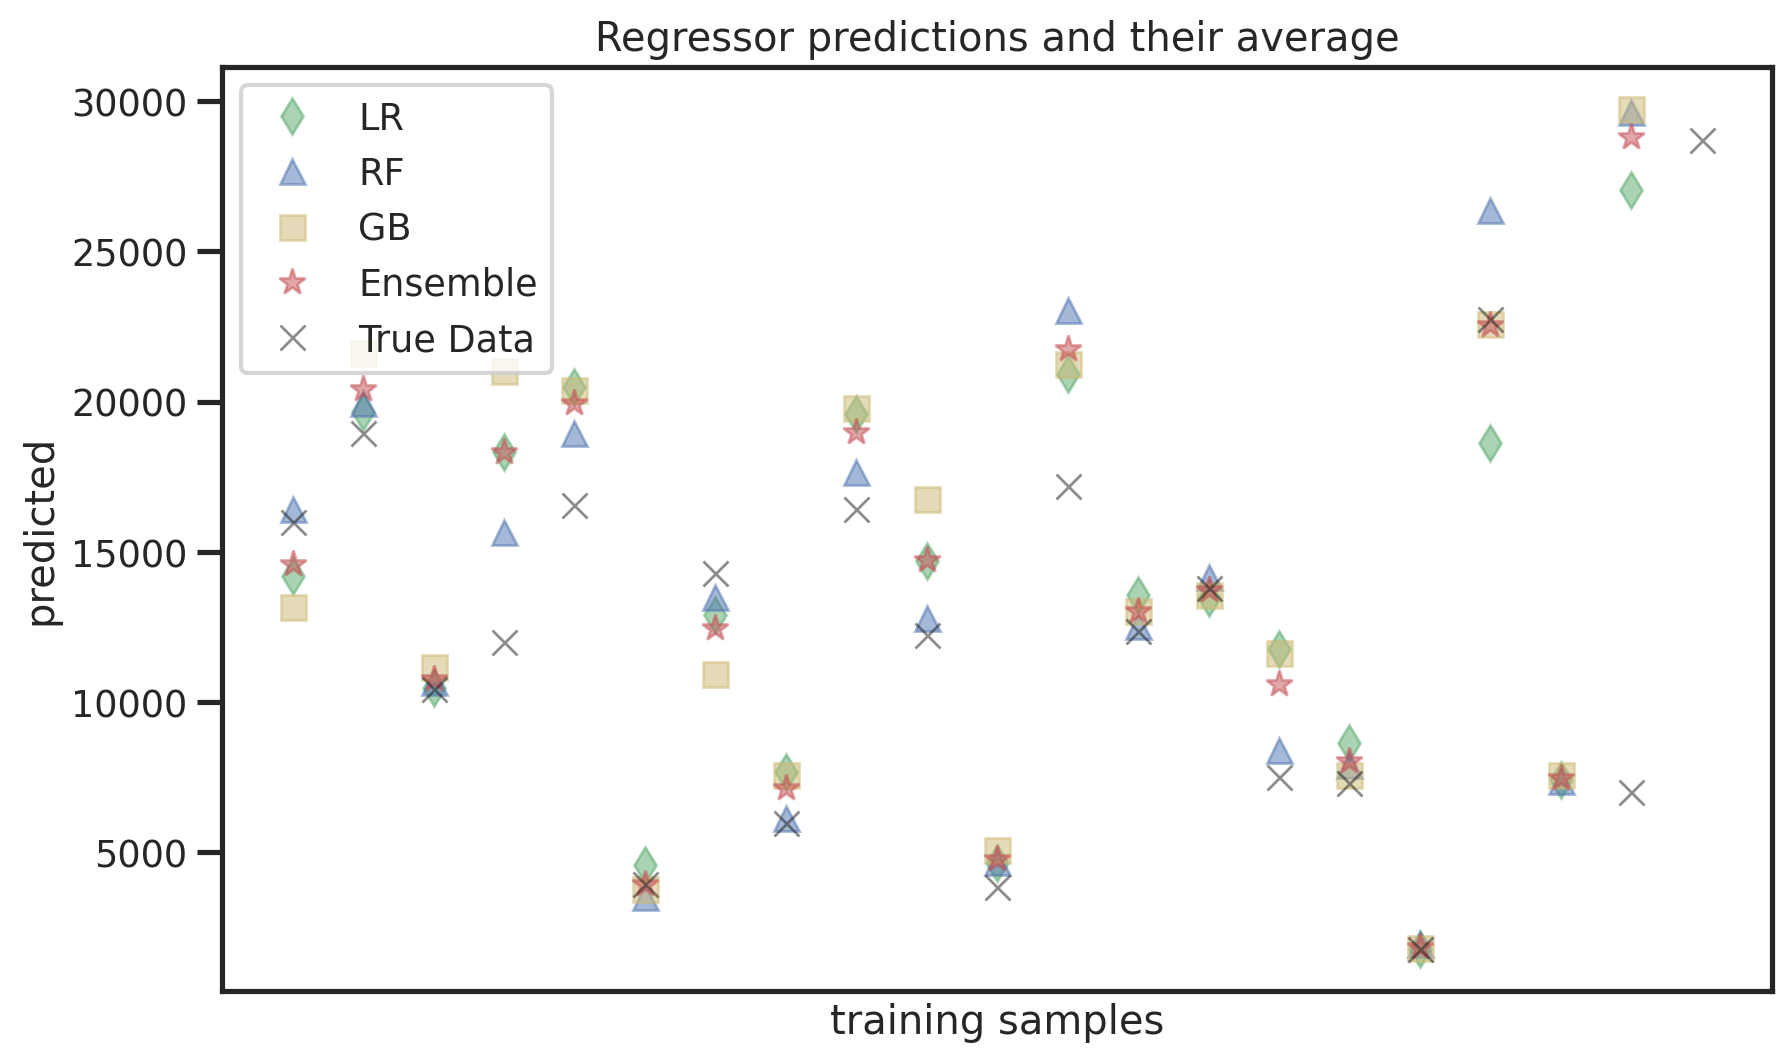

In [94]:
plt.figure(figsize=(10,6))
plt.plot(pred1, "gd", alpha=0.5, label="LR")
plt.plot(pred2, "b^", alpha=0.5, label="RF")
plt.plot(pred3, "ys", alpha=0.5, label="GB")
plt.plot(pred4, "r*", alpha=0.5, ms=10, label="Ensemble")
plt.plot(y.head(20), "kx", alpha=0.5, label="True Data")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.show()

In [95]:
#Ranking

In [96]:
import matplotlib.pyplot as plt

In [97]:
# Define the R-squared scores for each model
linear_r2 = 0.6821
rf_r2 = 0.8135
gb_r2 = 0.8116

# Create a list of the R-squared scores and the model names
r2_scores = [linear_r2, rf_r2, gb_r2]
model_names = ['Linear Regression', 'Random Forest', 'Gradient Boosting']

# Create a bar plot of the R-squared scores
plt.figure(figsize=(6, 4))
plt.bar(model_names, r2_scores, color=['blue','gray','black'])
plt.ylim([0.6, 0.9])
plt.ylabel('R-squared score')
plt.title('Comparison of model performance')
plt.show()

R-squared scores for Random Forest and Gradient Boosting models are very similar.So I will consider other metrics such as Mean Squared Error (MSE) or Root Mean Squared Error (RMSE).

In [98]:
#Based on other scores random forest regression is a better model than others

In [99]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(random_state= 42)

In [100]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

**Overfit/Underfit tradeoff** 

In [101]:
# Training set performance
y_pred_train = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_pred_train)
train_mae = mean_absolute_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)

print('Train_MSE:', train_mse)
print('Train_MAE:', train_mae)
print('Train_R-squared:', train_r2)

# Testing set performance
y_pred_test = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred_test)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print('Test_MSE:', test_mse)
print('Test_MAE:', test_mae)
print('Test_R-squared:', test_r2)

Train_MSE: 2344221.4235474668
Train_MAE: 968.1042336877993
Train_R-squared: 0.9665300212986389
Test_MSE: 13238561.56976538
Test_MAE: 2388.8883228537707
Test_R-squared: 0.8136530844036166


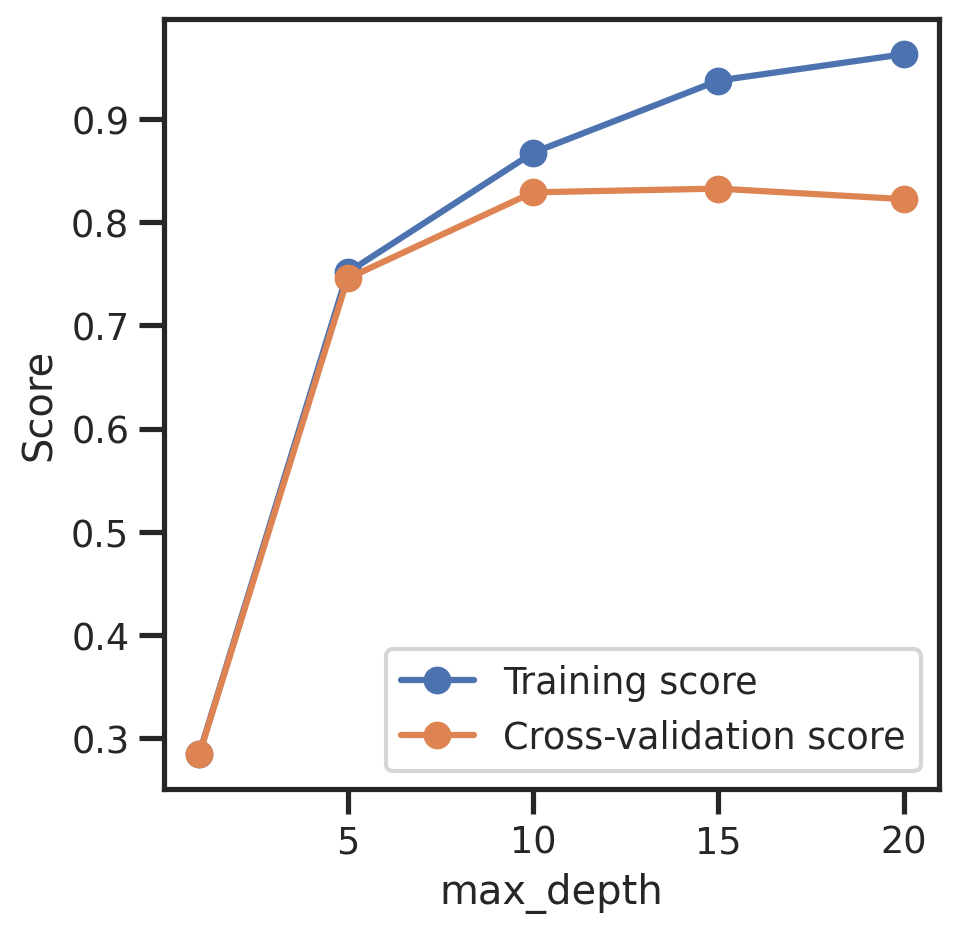

In [103]:
from sklearn.model_selection import validation_curve

param_range = [1, 5, 10, 15, 20]
train_scores, test_scores = validation_curve(
    model, X_train, y_train, param_name='max_depth', param_range=param_range, cv=5)
plt.figure(figsize=(5, 5))
plt.plot(param_range, np.mean(train_scores, axis=1), 'o-', label='Training')
plt.plot(param_range, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

**Randomised Grid Search**

In [104]:
from sklearn.model_selection import RandomizedSearchCV

In [105]:
random_grid={'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]}

In [106]:
model_random= RandomizedSearchCV(estimator=model,param_distributions=random_grid,scoring='neg_mean_squared_error',
                             n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)
model_random.fit(X_train,y_train)
y_pred5= model_random.best_estimator_.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   1.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   2.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   2.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   1.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   1.6s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=1, m

In [107]:
r2_rs = r2_score(y_test, y_pred5)
print('R-squared:', r2_rs)

R-squared: 0.8296747514004862


# **5. Model Evaluation and Analysis**

**5.1 Overall Performance with Cross-Validation**


In [108]:
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validation scores: ", scores)
print("Mean score: ", scores.mean())

Cross-validation scores:  [0.81215711 0.82862592 0.81725669 0.81995763 0.82029712]
Mean score:  0.8196588932089925


In [109]:
scores1 = cross_val_score(rfr_pipe, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
print(scores1.mean()*-1, scores1.std())

3528.9878949254153 89.53316291289342


**5.2 True vs Predicted Analysis**

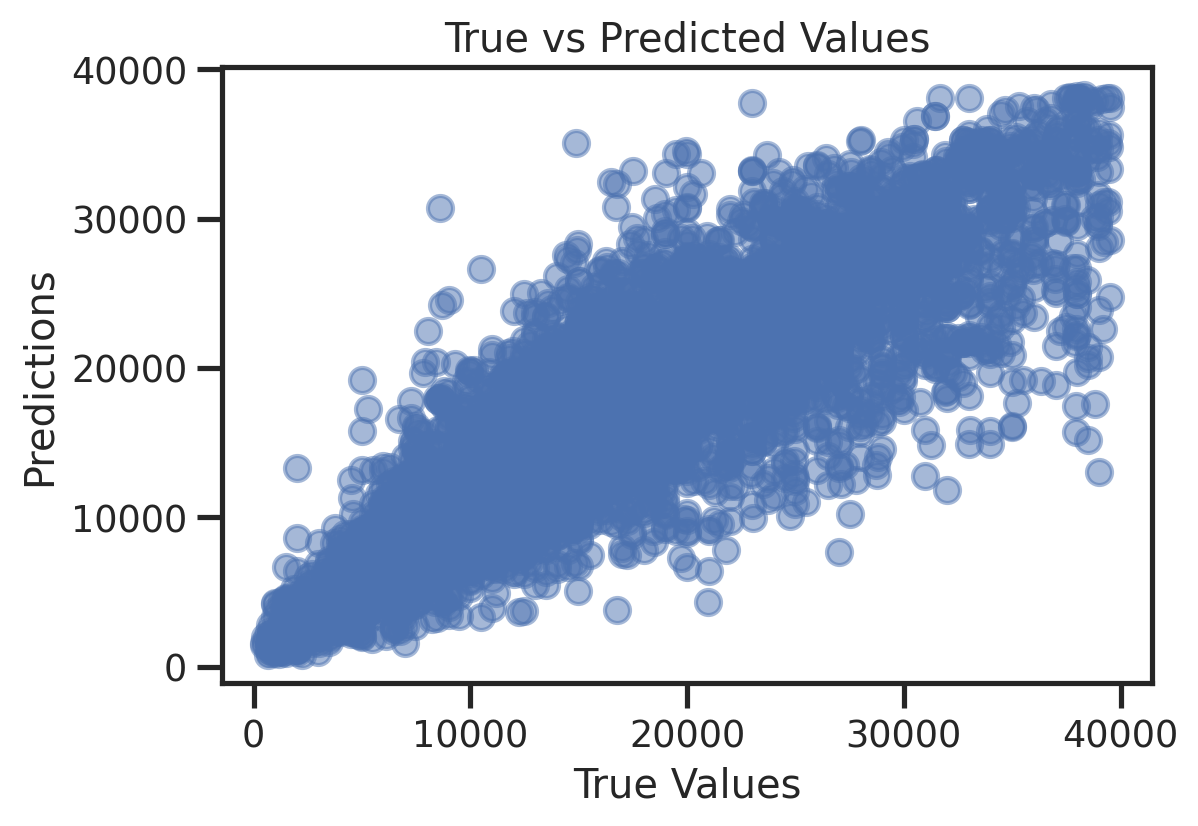

In [110]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred3, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()

**5.3 Global and Local Explanations with SHAP**


In [111]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [112]:
explainer = shap.Explainer(rf, X_train)

In [113]:
shap_values = explainer.shap_values(X_test.iloc[:100])


 96%|=================== | 96/100 [00:12<00:00]       

In [114]:
shap.summary_plot(
   shap_values, 
   X_test.iloc[:100]
)

In [115]:
idx = 42
instance = X_test.iloc[[idx]]
local_shap_values = explainer(instance)

shap.force_plot(explainer.expected_value, local_shap_values.values[0], instance.iloc[0])

In [116]:
import shap

# run initjs() to load the necessary JavaScript library
shap.initjs()

# create the SHAP force plot
shap.force_plot(explainer.expected_value, local_shap_values.values[0], instance.iloc[0])

**5.4 Partial Dependency Plots**

In [117]:
from sklearn.inspection import PartialDependenceDisplay

In [118]:
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    rf, X_test, features=[ 'body_type_ordinal', 'age_of_car','fuel_type_ordinal','standard_make_ordinal'],
    kind='both', #centered=True,
    subsample=100, grid_resolution=30, n_jobs=2, random_state=0,
    ax=ax, n_cols=2
);

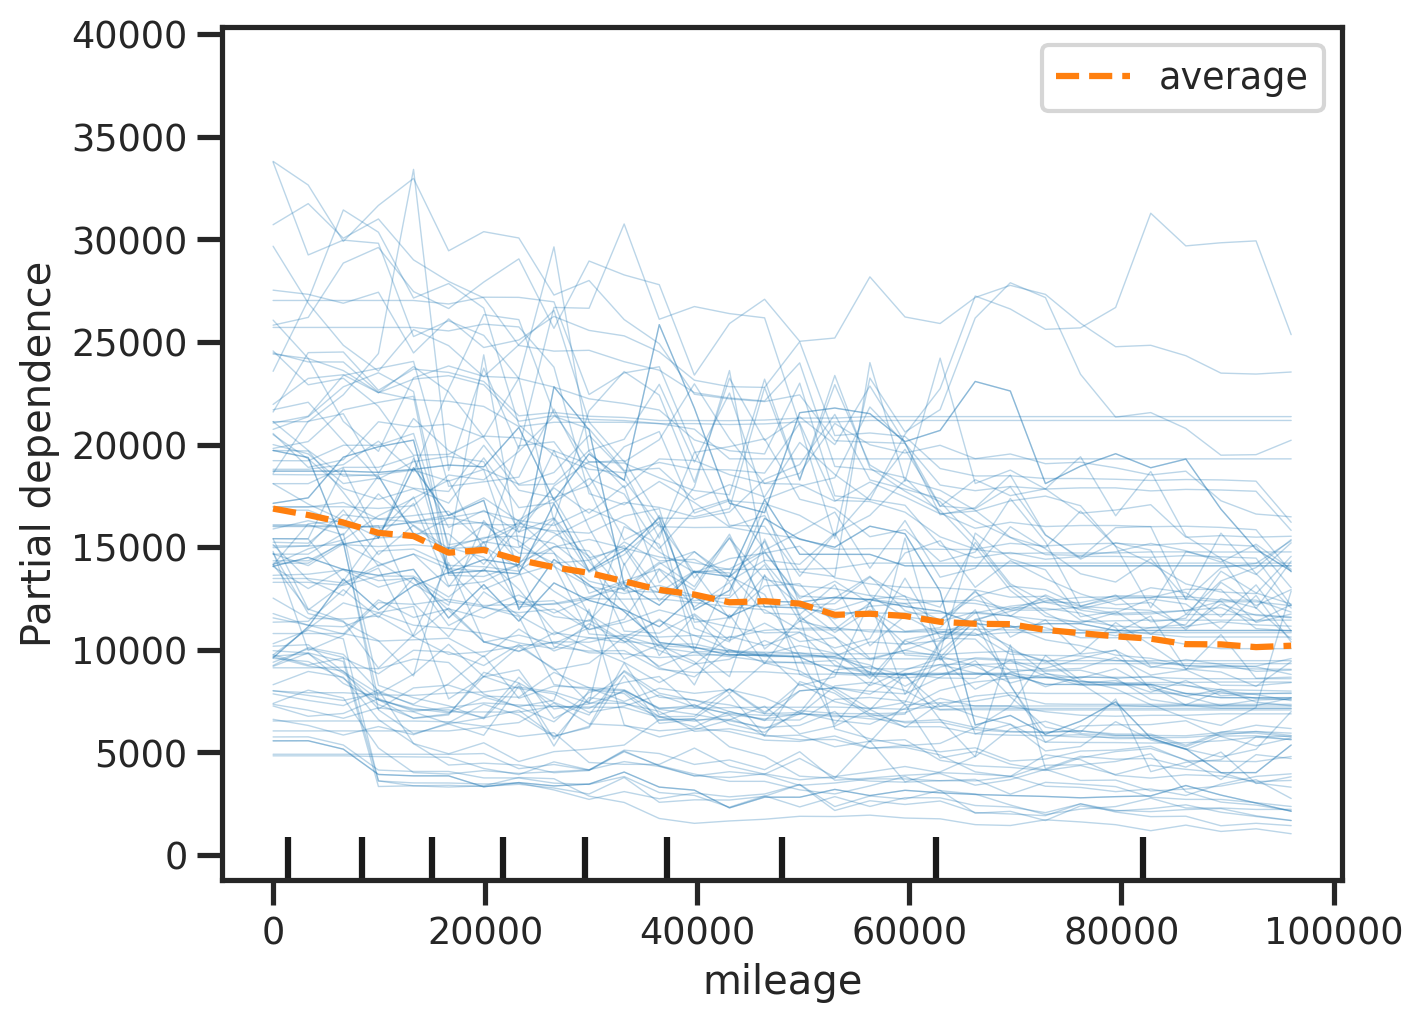

In [119]:
fig, ax = plt.subplots(figsize=(7,5), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    rf, X_test, features=['mileage'],
    kind='both', #centered=True,
    subsample=100, grid_resolution=30, n_jobs=2, random_state=0,
    ax=ax, n_cols=2
);